In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import control as ct
import enel441_utilities as eu
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

In [ ]:

def tf2surf(numtf,dentf,alpha,beta):

    S_mag = np.zeros((alpha.shape[0], beta.shape[0]))
    ii = 0
    for aa in alpha:
        jj = 0
        for bb in beta:
            s = complex(aa,bb)
            num_mag = eu.eval_poly(numtf,s)
            den_mag = eu.eval_poly(dentf,s)
            S_mag[ii,jj] = np.abs(num_mag/den_mag)
            if S_mag[ii,jj] > 6:
                S_mag[ii,jj] = 6
            jj+=1
        ii+=1
    Alpha, Beta = np.meshgrid(beta, alpha)
    return Alpha, Beta, S_mag

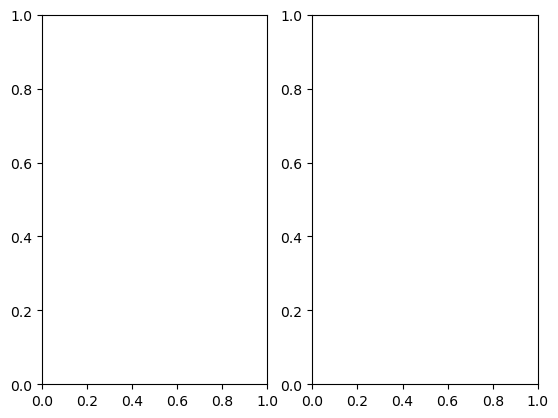

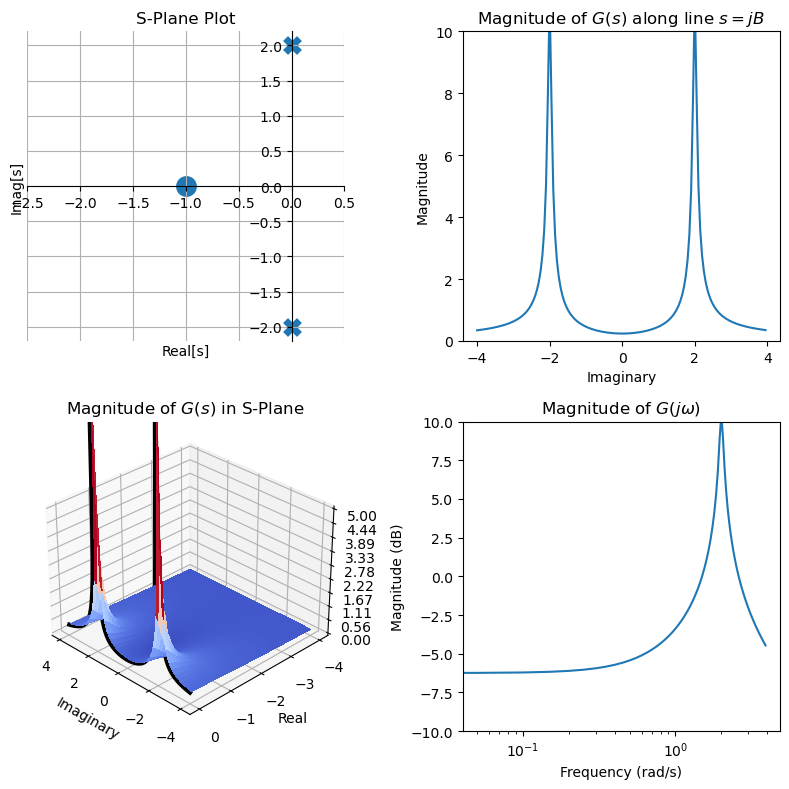

In [19]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Proportional Control of Drone', artist='Matplotlib',
                comment='visualize error when using proportional control')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig, ax = plt.subplots(1,2)

alpha_vec = np.linspace(-2,0,100)
beta = 2
alpha_range = np.arange(-4,0,0.05)
beta_range = np.arange(-4,4,0.05)

fig=plt.figure(figsize=(8,8))

# Update the frames for the movie
with writer.saving(fig, "s_plane_robustness.mp4", 100):
    for alpha_ii in alpha_vec:
        num = eu.roots_to_polynomial([-1])
        den = eu.roots_to_polynomial([complex(alpha_ii,beta), complex(alpha_ii,-beta)])
        S = ct.tf(num,den)
        # Make data.

        Alpha,Beta,S_mag = tf2surf(num,den,alpha_range,beta_range)
        
        plt.clf()

        ax = fig.add_subplot(2,2,1)
        eu.enel441_s_plane_plot(num, den, fig=fig, ax=ax)
        ax.set_xlim(-2.5,0.5)

        ax = fig.add_subplot(2,2,3,projection='3d')
        # Plot the surface.
        surf = ax.plot_surface(Alpha, Beta, S_mag, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

        # Customize the z axis.
        ax.set_zlim(0, 5)
        ax.zaxis.set_major_locator(LinearLocator(10))
        # A StrMethodFormatter is used automatically
        ax.zaxis.set_major_formatter('{x:.02f}')
        #ax.view_init(elev=30, azim=180, roll=0)
        ax.view_init(azim=135)
        ax.set_ylabel('Real')
        ax.set_xlabel('Imaginary')
        ax.set_title('Magnitude of $G(s)$ in S-Plane')
        ax.plot(beta_range,np.zeros(beta_range.shape[0]),S_mag[-1,:],'k',linewidth=3)

        # Add a color bar which maps values to colors.
        #fig.colorbar(surf, shrink=0.5, aspect=5)

        ax = fig.add_subplot(2,2,2)
        ax.plot(beta_range,S_mag[-1,:])
        ax.set_xlabel('Imaginary')
        ax.set_ylabel('Magnitude')
        ax.set_title('Magnitude of $G(s)$ along line $s=jB$')
        ax.set_ylim(0,10)

        n_half = int(beta_range.shape[0]/2)
        ax=fig.add_subplot(2,2,4)
        ax.semilogx(beta_range[n_half:-1],10*np.log10(np.abs(S_mag[-1,n_half:-1])))
        ax.set_xlabel('Frequency (rad/s)')
        ax.set_title('Magnitude of $G(j\omega)$')
        ax.set_ylabel('Magnitude (dB)')
        ax.set_ylim(-10,10)
        fig.set_tight_layout(True)
        
        writer.grab_frame()


In [16]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="s_plane_robustness.mp4" type="video/mp4">
</video></div>""")